导入数据

In [2]:
#导入处理数据包
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV

#导入数据
#训练数据集
train = pd.read_csv('train.csv')
#测试数据集
test = pd.read_csv('test.csv')
print('训练数据集：',train.shape,' 测试数据集：',test.shape)


训练数据集： (891, 12)  测试数据集： (418, 11)


把训练数据和测试数据进行合并,以便同时对两个数据集进行清洗，

In [3]:
full = pd.concat([train, test], ignore_index=True)
print('合并后的数据集：', full.shape)

合并后的数据集： (1309, 12)


查看数据

In [4]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


获取数据类型列的描述统计信息


In [5]:
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


Age存在缺失数据；Fare存在空值（不合实际）

查看每一列的数据类型，和数据总数


In [6]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


年龄（Age）、船票价格（Fare）、船舱号（Cabin）、登船港口（Embarked）里有缺失数据

清洗数据
处理缺失值
年龄（Age）和船票价格（Fare）是数值类型数据，用平均数来填充缺失值

In [7]:
full['Age']=full['Age'].fillna(full['Age'].mean())
full['Fare']=full['Fare'].fillna(full['Fare'].mean())

登船港口（Embarked）是字符串数据，且仅缺失2条数据，将缺失值填充为最频繁出现的值

In [8]:
#查看登船港口（Embarked）数据
full['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [9]:
#分类变量Embarked，查找最常见的类别
full['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [10]:
full['Embarked']= full['Embarked'].fillna('S')

船舱号（Cabin）是字符串数据，缺失数据比较多，缺失值填充为“U”，表示未知（Unknow）

In [11]:
full['Cabin']=full['Cabin'].fillna('U')

#查看最终缺失值处理情况
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


乘客性别（Sex）：male对应数值1，female对应数值0，使用Series.map()函数

In [12]:
full['Sex']=full['Sex'].map({'male':0,'female':1})
full['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

登船港口（Embarked）：S，C，Q，使用get_dummies进行one-hot编码。

In [13]:
EmbarkedDf = pd.DataFrame()
EmbarkedDf = pd.get_dummies(full['Embarked'],prefix='Embarked')
EmbarkedDf.head()

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


添加编码产生的变量到数据集full，并把登船港口(Embarked)删掉

In [14]:
full = pd.concat([full,EmbarkedDf],axis=1)
full=full.drop('Embarked',axis=1)

客舱等级（Pclass）:1=1等舱，2=2等舱，3=3等舱，使用get_dummies进行编码

In [15]:
PclassDf = pd.DataFrame()
PclassDf=pd.get_dummies(full['Pclass'],prefix='Pclass')
PclassDf.head()

,Pclass_1,Pclass_2,Pclass_3
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True


添加编码产生的变量到数据集full，并把客舱等级(Pclass)删掉。

In [16]:
full=pd.concat([full,PclassDf],axis=1)
full=full.drop('Pclass',axis=1)

从姓名（Name）中提取头衔：乘客头衔每个名字当中都包含了具体的称谓或者说是头衔
例如：'Braund, Mr. Owen Harris'，逗号前面的是“名”，逗号后面是‘头衔. 姓’，将这部分信息提取出来后可以作为非常有用的一个新变量，用来帮助预测。

In [17]:
#定义函数：从姓名中获取头衔
def getTitle(name):
    str1 = name.split(',')[1]
    str2 = str1.split('.')[0]
    #strip() 方法用于移除字符串头尾指定的字符（默认为空格）
    str3=str2.strip()
    return str3

TitleDf=pd.DataFrame()
full['Name']=full['Name'].map(getTitle)
full['Name'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Name, dtype: object

Officer	政府官员
Royalty	王室（皇室）
Mr	已婚男士
Mrs	已婚妇女
Miss	年轻未婚女子
Master	有技能的人/教师

In [18]:
title_mapDict = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }
full['Name']=full['Name'].map(title_mapDict)
TitleDf = pd.get_dummies(full['Name'])
TitleDf.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,False,False,True,False,False,False
1,False,False,False,True,False,False
2,False,True,False,False,False,False
3,False,False,False,True,False,False
4,False,False,True,False,False,False


In [19]:
full = pd.concat([full,TitleDf],axis=1)
full= full.drop('Name',axis=1)

从客舱号（Cabin）中提取客舱类别：客舱号的首字母是客舱的类别，提取首字母，并进行one-hot编码。

In [20]:
full['Cabin'] = full['Cabin'].map(lambda c:c[0])
full['Cabin'].head()

0    U
1    C
2    U
3    C
4    U
Name: Cabin, dtype: object

In [21]:
CabinDf = pd.DataFrame()
CabinDf = pd.get_dummies(full['Cabin'],prefix='Cabin')
CabinDf.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,False,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True


In [22]:
full = pd.concat([full,CabinDf],axis=1)
full = full.drop('Cabin',axis =1)

建立家庭人数和家庭规模：家庭人数=同代直系亲属数（Parch）+不同代直系亲属数（SibSp）+乘客自己。

In [23]:
FamilyDf=pd.DataFrame()
FamilyDf['FamilySize']= full['Parch']+full['SibSp']+1

小家庭Family_Small：家庭人数=1；
中等家庭Family_Medium: 2<=家庭人数<=4；
大家庭Family_Large: 家庭人数>=5。

In [24]:
FamilyDf['Family_Small']=FamilyDf['FamilySize'].map(lambda a:1 if a == 1 else 0)
FamilyDf['Family_Medium']=FamilyDf['FamilySize'].map(lambda a:1 if 2 <= a <=4 else 0)
FamilyDf['Family_Large']=FamilyDf['FamilySize'].map(lambda a:1 if a >= 5 else 0)
FamilyDf.head()

,FamilySize,Family_Small,Family_Medium,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [25]:
full = pd.concat([full,FamilyDf],axis=1)
full.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,FamilySize,Family_Small,Family_Medium,Family_Large
0,1,0.0,0,22.0,1,0,A/5 21171,7.2500,False,False,...,False,False,False,False,False,True,2,0,1,0
1,2,1.0,1,38.0,1,0,PC 17599,71.2833,True,False,...,False,False,False,False,False,False,2,0,1,0
2,3,1.0,1,26.0,0,0,STON/O2. 3101282,7.9250,False,False,...,False,False,False,False,False,True,1,1,0,0
3,4,1.0,1,35.0,1,0,113803,53.1000,False,False,...,False,False,False,False,False,False,2,0,1,0
4,5,0.0,0,35.0,0,0,373450,8.0500,False,False,...,False,False,False,False,False,True,1,1,0,0


特征选择：

采用相关系数法计算各个特征的相关系数

In [26]:
full=full.drop('Ticket',axis=1)

In [27]:
#相关性矩阵
corrDf = full.corr() 
corrDf

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,FamilySize,Family_Small,Family_Medium,Family_Large
PassengerId,1.000000,-0.005007,-0.013406,0.025731,-0.055224,0.008942,0.031416,0.048101,0.011585,-0.049836,...,0.000549,-0.008136,0.000306,-0.045949,-0.023049,0.000208,-0.031437,0.028546,0.002975,-0.063415
Survived,-0.005007,1.000000,0.543351,-0.070323,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683,...,0.150716,0.145321,0.057935,0.016040,-0.026456,-0.316912,0.016639,-0.203367,0.279855,-0.125147
Sex,-0.013406,0.543351,1.000000,-0.057397,0.109609,0.213125,0.185484,0.066564,0.088651,-0.115193,...,0.057396,0.040340,0.006655,0.083285,-0.020558,-0.137396,0.188583,-0.284537,0.255196,0.077748
Age,0.025731,-0.070323,-0.057397,1.000000,-0.190747,-0.130872,0.171521,0.076179,-0.012718,-0.059153,...,0.132886,0.106600,-0.072644,-0.085977,0.032461,-0.271918,-0.196996,0.116675,-0.038189,-0.161210
SibSp,-0.055224,-0.035322,0.109609,-0.190747,1.000000,0.373587,0.160224,-0.048396,-0.048678,0.073709,...,-0.015727,-0.027180,-0.008619,0.006015,-0.013247,0.009064,0.861952,-0.591077,0.253590,0.699681
Parch,0.008942,0.081629,0.213125,-0.130872,0.373587,1.000000,0.221522,-0.008635,-0.100943,0.071881,...,-0.027385,0.001084,0.020481,0.058325,-0.012304,-0.036806,0.792296,-0.549022,0.248532,0.624627
Fare,0.031416,0.257307,0.185484,0.171521,0.160224,0.221522,1.000000,0.286241,-0.130054,-0.169894,...,0.072737,0.073949,-0.037567,-0.022857,0.001179,-0.507197,0.226465,-0.274826,0.197281,0.170853
Embarked_C,0.048101,0.168240,0.066564,0.076179,-0.048396,-0.008635,0.286241,1.000000,-0.164166,-0.778262,...,0.107782,0.027566,-0.020010,-0.031566,-0.014095,-0.258257,-0.036553,-0.107874,0.159594,-0.092825
Embarked_Q,0.011585,0.003650,0.088651,-0.012718,-0.048678,-0.100943,-0.130054,-0.164166,1.000000,-0.491656,...,-0.061459,-0.042877,-0.020282,-0.019941,-0.008904,0.142369,-0.087190,0.127214,-0.122491,-0.018423
Embarked_S,-0.049836,-0.149683,-0.115193,-0.059153,0.073709,0.071881,-0.169894,-0.778262,-0.491656,1.000000,...,-0.056023,0.002960,0.030575,0.040560,0.018111,0.137351,0.087771,0.014246,-0.062909,0.093671


查看各个特征与生存情况（Survived）的相关系数，ascending=False表示按降序排列

In [28]:
corrDf['Survived'].sort_values(ascending=False)

Survived         1.000000
Sex              0.543351
Mrs              0.344935
Miss             0.332795
Pclass_1         0.285904
Family_Medium    0.279855
Fare             0.257307
Cabin_B          0.175095
Embarked_C       0.168240
Cabin_D          0.150716
Cabin_E          0.145321
Cabin_C          0.114652
Pclass_2         0.093349
Master           0.085221
Parch            0.081629
Cabin_F          0.057935
Royalty          0.033391
Cabin_A          0.022287
FamilySize       0.016639
Cabin_G          0.016040
Embarked_Q       0.003650
PassengerId     -0.005007
Cabin_T         -0.026456
Officer         -0.031316
SibSp           -0.035322
Age             -0.070323
Family_Large    -0.125147
Embarked_S      -0.149683
Family_Small    -0.203367
Cabin_U         -0.316912
Pclass_3        -0.322308
Mr              -0.549199
Name: Survived, dtype: float64

绘制相关系数的热力图，直观地展示各个变量之间的相关性

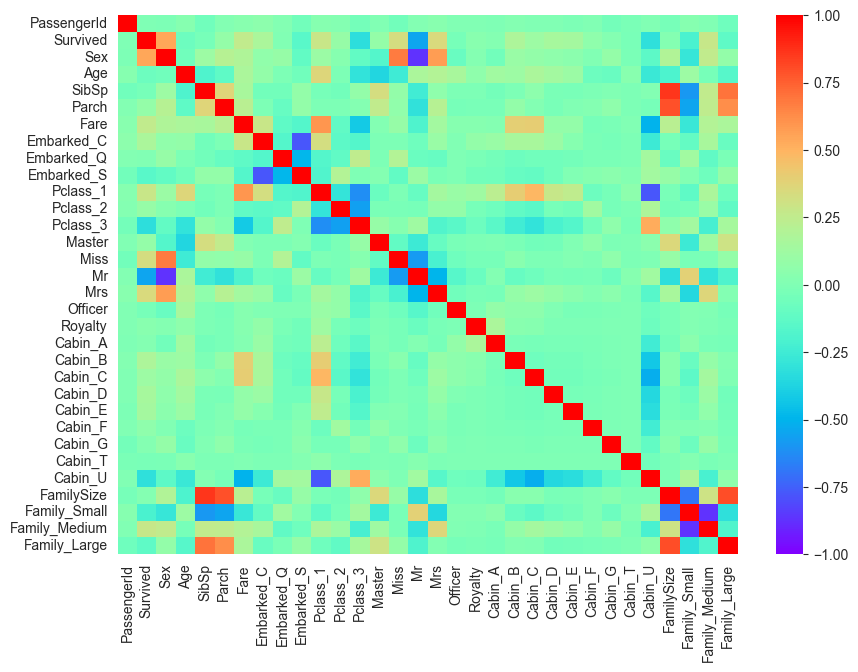

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,7))
ax=sns.heatmap(corrDf,vmin=-1,annot=False,cmap="rainbow")

从热力图可以看出和生存情况（Survived）相关系数高的特征有：头衔（TitleDf数据集）、客舱等级（PclassDf数据集）、家庭规模（FamilyDf数据集）、船票价格（Fare）、船舱号（CabinDf数据集）、登船港口（EmbarkedDf数据集）和性别（Sex）、年龄
选择这几个特征作为模型的输入

In [30]:
full_X = pd.concat([TitleDf,PclassDf,FamilyDf,full['Fare'],CabinDf,EmbarkedDf,full['Sex'],full['Age']],axis=1)
full_X.head()

,Master,Miss,Mr,Mrs,Officer,Royalty,Pclass_1,Pclass_2,Pclass_3,FamilySize,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Sex,Age
0,False,False,True,False,False,False,False,False,True,2,...,False,False,False,False,True,False,False,True,0,22.0
1,False,False,False,True,False,False,True,False,False,2,...,False,False,False,False,False,True,False,False,1,38.0
2,False,True,False,False,False,False,False,False,True,1,...,False,False,False,False,True,False,False,True,1,26.0
3,False,False,False,True,False,False,True,False,False,2,...,False,False,False,False,False,False,False,True,1,35.0
4,False,False,True,False,False,False,False,False,True,1,...,False,False,False,False,True,False,False,True,0,35.0


选取有Survived信息的数据集source

In [31]:
import matplotlib.pyplot as plt
#原始数据集有891行
sourceRow = 891
source = full.loc[0:sourceRow-1,:]

不同性别的乘客存活情况

In [32]:
Sur_m = source.loc[source['Sex']==1,'Survived'].value_counts()
Sur_f = source.loc[source['Sex']==0,'Survived'].value_counts()
SexDf = pd.DataFrame({'male':Sur_m,'female':Sur_f})
SexDf

,male,female
Survived,,
0.0,81,468
1.0,233,109


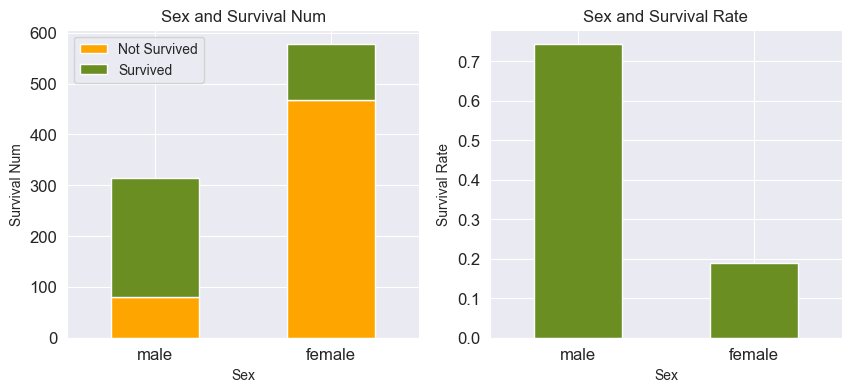

In [33]:
fig = plt.figure(figsize=(10,4))
# 绘制图1
ax1 = plt.subplot(1,2,1)
#对转置后的数据集画图
SexDf.T.plot(ax=ax1,kind = 'bar',stacked = True,color=['orange','olivedrab'],fontsize=12)
plt.title('Sex and Survival Num')
plt.xlabel('Sex')
plt.ylabel('Survival Num')
plt.xticks(rotation = 0)
plt.legend(labels=['Not Survived','Survived'])
# 绘制图2
ax2 = plt.subplot(1,2,2)
for i in SexDf.columns:
    SexDf.loc['Survived Rate',i] = SexDf.loc[1,i]/SexDf[i].sum()
SexDf.loc['Survived Rate'].plot(ax=ax2,kind='bar', color='olivedrab',fontsize=12)
plt.title('Sex and Survival Rate')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.xticks(rotation = 0)
plt.show()

从图中可知，船上男性乘客人数大约为女性乘客的2倍，
然而男性乘客的存活率仅约为20%，女性乘客的存活率达到70%以上，
很可能泰坦尼克号当时采取女性优先逃离的原则。

 从不同登船港口登船的乘客存活情况

In [34]:
Sur_C = source.loc[source['Embarked_C']==1,'Survived'].value_counts()
Sur_Q = source.loc[source['Embarked_Q']==0,'Survived'].value_counts()
Sur_S = source.loc[source['Embarked_S']==0,'Survived'].value_counts()
EmbarkedDf = pd.DataFrame({'Embarked_C':Sur_C,'Embarked_Q':Sur_Q,'Embarked_S':Sur_S})
EmbarkedDf

,Embarked_C,Embarked_Q,Embarked_S
Survived,,,
0.0,75,502,122
1.0,93,312,123


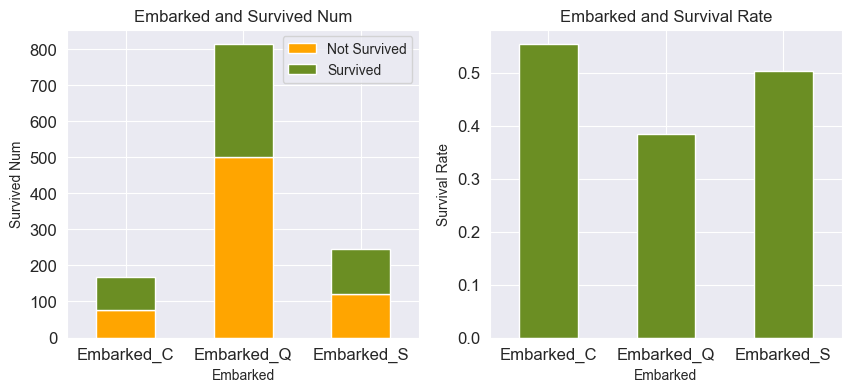

In [35]:
fig = plt.figure(figsize = (10,4))
# 绘制图1
ax1 = plt.subplot(1,2,1)
EmbarkedDf.T.plot(ax=ax1,kind='bar',stacked=True, color=['orange','olivedrab'],fontsize=12)
plt.title('Embarked and Survived Num')
plt.xlabel('Embarked')
plt.ylabel('Survived Num')
plt.xticks(rotation=0)
plt.legend(labels=['Not Survived','Survived'])
# 绘制图2
ax2 = plt.subplot(1,2,2)
for i in EmbarkedDf.columns:
    EmbarkedDf.loc['Survived Rate',i]=EmbarkedDf.loc[1,i]/EmbarkedDf[i].sum()
EmbarkedDf.loc['Survived Rate'].plot(ax=ax2,kind='bar',color='olivedrab',fontsize=12)
plt.title('Embarked and Survival Rate')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

从图中可知，大部分乘客是从泰坦尼克号起始地点Embarked_S（英国南安普敦港口）出发的，而这部分乘客的存活率却最低，可能与其基数大、乘客身份复杂有关。在Embarked_C（法国瑟堡市港口）登船的乘客相对存活率最高，达到50%以上。


不同客舱等级的乘客存活情况

In [36]:
Sur_P1 = source.loc[source['Pclass_1']==1,'Survived'].value_counts()
Sur_P2 = source.loc[source['Pclass_2']==1,'Survived'].value_counts()
Sur_P3 = source.loc[source['Pclass_3']==1,'Survived'].value_counts()
PclassDf = pd.DataFrame({'Pclass_1':Sur_P1,'Pclass_2':Sur_P2,'Pclass_3':Sur_P3})
PclassDf

,Pclass_1,Pclass_2,Pclass_3
Survived,,,
0.0,80,97,372
1.0,136,87,119


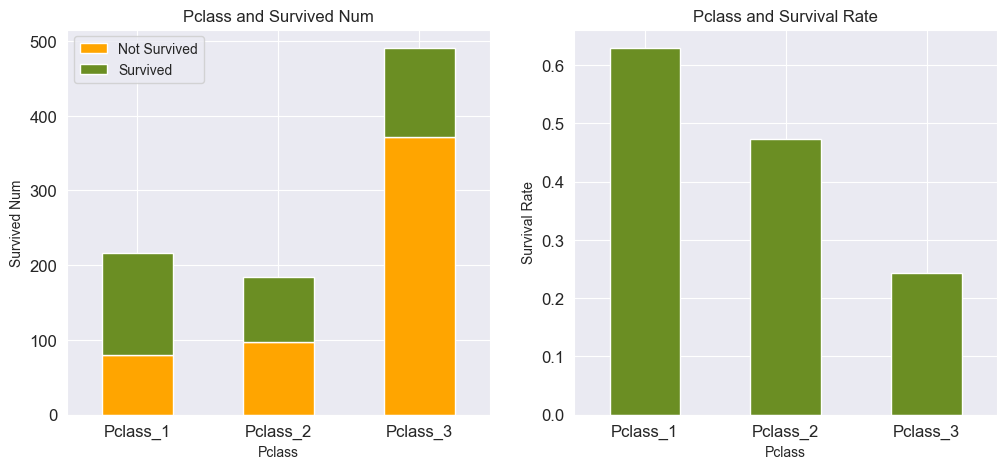

In [37]:
fig = plt.figure(figsize=(12,5))
# 绘制图1
ax1 = plt.subplot(1,2,1)
PclassDf.T.plot(ax=ax1,kind='bar',stacked=True, color=['orange','olivedrab'],fontsize=12)
plt.title('Pclass and Survived Num')
plt.xlabel('Pclass')
plt.ylabel('Survived Num')
plt.xticks(rotation=0)
plt.legend(labels=['Not Survived','Survived'])
# 绘制图2
ax2 = plt.subplot(1,2,2)
for i in PclassDf.columns:
    PclassDf.loc['Survived Rate',i]=PclassDf.loc[1,i]/PclassDf[i].sum()
PclassDf.loc['Survived Rate'].plot(ax=ax2,kind='bar',color='olivedrab',fontsize=12)
plt.title('Pclass and Survival Rate')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

从图中可知，购买三等舱船票的乘客最多，乘客存活率从一等舱到三等舱依次下降，根据调研得知，客舱等级越低，所居住的位置就越靠近船舱的底部，灾难发生时逃生所需的时间越久，存活率越低。

不同身份的乘客存活情况

In [38]:
Sur_Master = source.loc[source['Master']==1,'Survived'].value_counts()
Sur_Miss = source.loc[source['Miss']==1,'Survived'].value_counts()
Sur_Mr = source.loc[source['Mr']==1,'Survived'].value_counts()
Sur_Mrs = source.loc[source['Mrs']==1,'Survived'].value_counts()
Sur_Officer = source.loc[source['Officer']==1,'Survived'].value_counts()
Sur_Royalty = source.loc[source['Royalty']==1,'Survived'].value_counts()
StatusDf = pd.DataFrame({'Master':Sur_Master,'Miss':Sur_Miss,'Mr':Sur_Mr,
                        'Mrs':Sur_Mrs,'Officer':Sur_Officer,'Royalty':Sur_Royalty})
StatusDf

,Master,Miss,Mr,Mrs,Officer,Royalty
Survived,,,,,,
0.0,17,55,436,26,13,2
1.0,23,129,81,101,5,3


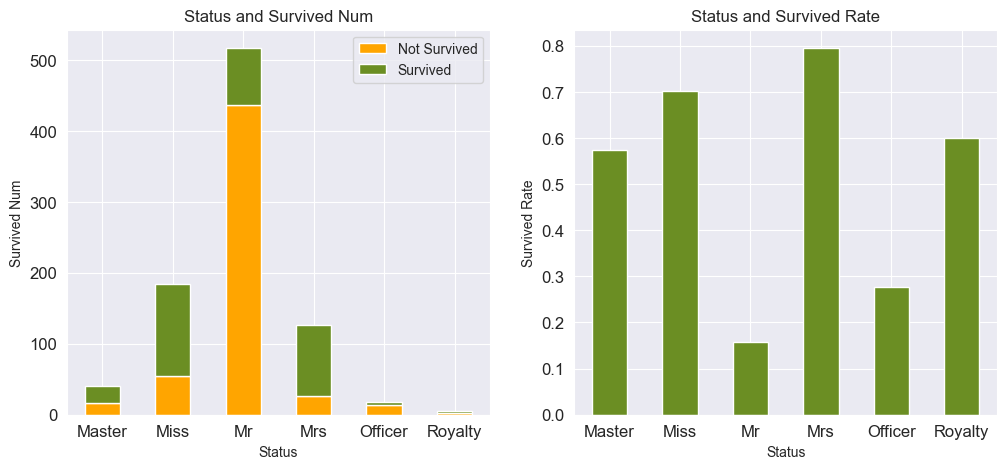

In [39]:
fig = plt.figure(figsize=(12,5))
#绘制图1
ax1 = plt.subplot(1,2,1)
StatusDf.T.plot(ax=ax1, kind='bar',stacked=True, color=['orange','olivedrab'],fontsize=12)
plt.title('Status and Survived Num')
plt.xlabel('Status')
plt.ylabel('Survived Num')
plt.xticks(rotation =0)
plt.legend(labels=['Not Survived','Survived'])
#绘制图2
ax2 = plt.subplot(1,2,2)
for i in StatusDf.columns:
    StatusDf.loc['Survived Rate',i]=StatusDf.loc[1,i]/StatusDf[i].sum()
StatusDf.loc['Survived Rate'].plot(ax = ax2,kind='bar',color = 'olivedrab',fontsize=12)
plt.title('Status and Survived Rate')
plt.xlabel('Status')
plt.ylabel('Survived Rate')
plt.xticks(rotation=0)
plt.show()

从图中可知，乘客中已婚男士（Mr）数量最多，其次是未婚女士（Miss）和已婚女士（Mrs），专业技能者（Master）、政府官员（Officer）和皇室成员（Royalty）只占少数。然而已婚男士的存活率最低，政府官员的存活率也较低，已婚女士和未婚女士的存活率分别居第一和第二，进一步证明了泰坦尼克号当时采取女性优先逃离的原则。

购买不同价格船票的乘客存活情况

In [40]:
source['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [41]:
source['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [42]:
#对乘客按照船票价格的四分位数进行分段
bins=[0,8,15,31,600]
source['FareLevel']=pd.cut(source['Fare'],bins,labels=['0-8','8-15','15-31','31-600'])
Sur_F1 = source.loc[source['FareLevel']=='0-8','Survived'].value_counts()
Sur_F2 = source.loc[source['FareLevel']=='8-15','Survived'].value_counts()
Sur_F3 = source.loc[source['FareLevel']=='15-31','Survived'].value_counts()
Sur_F4 = source.loc[source['FareLevel']=='31-600','Survived'].value_counts()
FareDf = pd.DataFrame({'0-8':Sur_F1,'8-15':Sur_F2,'15-31':Sur_F3,'31-600':Sur_F4})
FareDf

C:\Users\HP\AppData\Local\Temp\ipykernel_14564\946563966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source['FareLevel']=pd.cut(source['Fare'],bins,labels=['0-8','8-15','15-31','31-600'])


,0-8,8-15,15-31,31-600
Survived,,,,
0.0,175,155,112,93
1.0,51,62,99,129


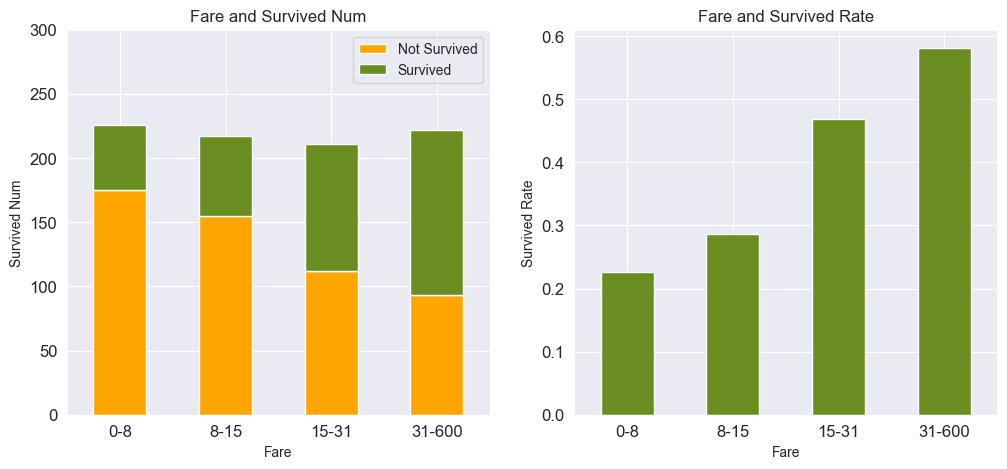

In [43]:
fig = plt.figure(figsize=(12,5))
#绘制图1
ax1 = plt.subplot(1,2,1)
FareDf.T.plot(ax=ax1, kind='bar',stacked=True, color=['orange','olivedrab'],fontsize=12)
plt.title('Fare and Survived Num')
plt.xlabel('Fare')
plt.ylabel('Survived Num')
plt.xticks(rotation =0)
plt.ylim(0, 300)
plt.legend(labels=['Not Survived','Survived'])
#绘制图2
ax2 = plt.subplot(1,2,2)
for i in FareDf.columns:
    FareDf.loc['Survived Rate',i]=FareDf.loc[1,i]/FareDf[i].sum()
FareDf.loc['Survived Rate'].plot(ax = ax2,kind='bar',color = 'olivedrab',fontsize=12)
plt.title('Fare and Survived Rate')
plt.xlabel('Fare')
plt.ylabel('Survived Rate')
plt.xticks(rotation=0)
plt.show()

从图中可知，购买船票价格越高的乘客存活率越高，船票价格越高，乘客所在的客舱等级也越高，这和客舱等级越高，乘客存活率越高的结论一致。

In [44]:
Sur_small=source.loc[source['Family_Small']==1,'Survived'].value_counts()
Sur_medium=source.loc[source['Family_Medium']==1,'Survived'].value_counts()
Sur_large=source.loc[source['Family_Large']==1,'Survived'].value_counts()
FamilyDf=pd.DataFrame({'Family_Small':Sur_small,'Family_Medium':Sur_medium,'Family_Large':Sur_large})
FamilyDf

,Family_Small,Family_Medium,Family_Large
Survived,,,
0.0,374,123,52
1.0,163,169,10


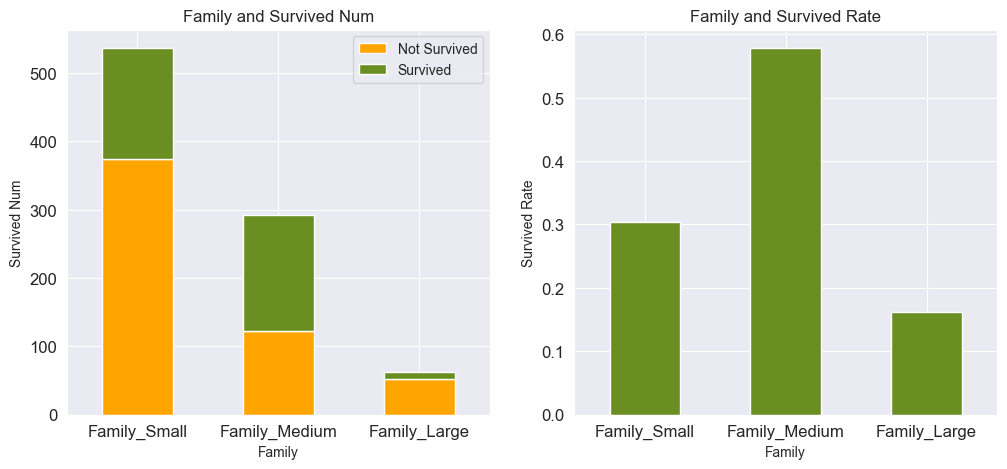

In [45]:
fig = plt.figure(figsize=(12,5))
#绘制图1
ax1 = plt.subplot(1,2,1)
FamilyDf.T.plot(ax=ax1, kind='bar',stacked=True, color=['orange','olivedrab'],fontsize=12)
plt.title('Family and Survived Num')
plt.xlabel('Family')
plt.ylabel('Survived Num')
plt.xticks(rotation =0)
plt.legend(labels=['Not Survived','Survived'])
#绘制图2
ax2 = plt.subplot(1,2,2)
for i in FamilyDf.columns:
    FamilyDf.loc['Survived Rate',i]=FamilyDf.loc[1,i]/FamilyDf[i].sum()
FamilyDf.loc['Survived Rate'].plot(ax = ax2,kind='bar',color = 'olivedrab',fontsize=12)
plt.title('Family and Survived Rate')
plt.xlabel('Family')
plt.ylabel('Survived Rate')
plt.xticks(rotation=0)
plt.show()

从图中可知，小规模家庭即独自出行的乘客人数最多，其次是中等规模家庭（2~4人）的乘客人数，5人以上的大规模家庭较少。从存活率上看，大规模家庭的乘客存活率最低，中等规模家庭的乘客存活率最高。

假设检验

假设一：大规模家庭女性乘客占比最低，中等规模家庭女性乘客占比最高

In [46]:
Sex_FS=(source.loc[source['Family_Small']==1,'Sex'].value_counts())/source['Family_Small'].sum()
Sex_FM=(source.loc[source['Family_Medium']==1,'Sex'].value_counts())/source['Family_Medium'].sum()
Sex_FL=(source.loc[source['Family_Large']==1,'Sex'].value_counts())/source['Family_Large'].sum()
FamilySexDf=pd.DataFrame({'Family_Small':Sex_FS,'Family_Medium':Sex_FM,'Family_Large':Sex_FL})
FamilySexDf

,Family_Small,Family_Medium,Family_Large
Sex,,,
0,0.765363,0.469178,0.467742
1,0.234637,0.530822,0.532258


<Figure size 1000x500 with 0 Axes>

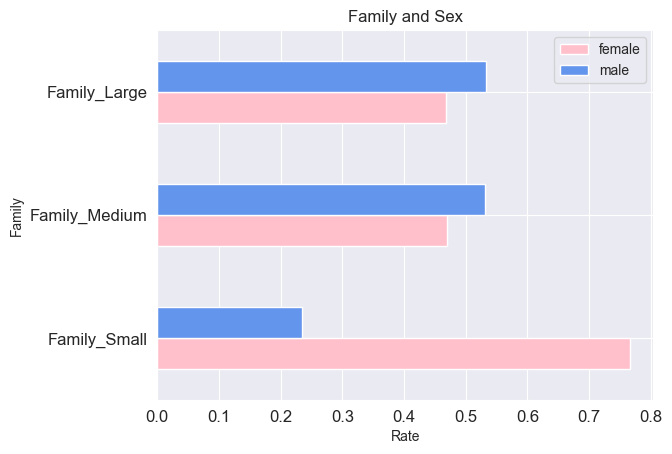

In [47]:
fig = plt.figure(figsize=(10,5))
FamilySexDf.T.plot(kind='barh', color=['pink','cornflowerblue'],fontsize=12)
plt.title('Family and Sex')
plt.xlabel('Rate')
plt.ylabel('Family')
plt.xticks(rotation =0)
plt.legend(labels=['female','male'])
plt.show()

得出结论：大规模家庭中女性占比最多，约为53.23%，中等规模家庭中女性占比几乎和大规模家庭相同，约为53.08%，独自出行的乘客中女性占比最少，约为23.46%，说明女性占比并不是影响存活率的因素，假设一不成立。



假设二：大规模家庭在三等舱乘客占比最高，中等规模家庭在一等舱乘客占比最高。

In [48]:
def get_pclass(row):
    for c in PclassDf.columns:
        if row[c]==1:
            return c
source['Pclass']=source.apply(get_pclass, axis=1)
Pclass_FS=(source.loc[source['Family_Small']==1,'Pclass'].value_counts())/source['Family_Small'].sum()
Pclass_FM=(source.loc[source['Family_Medium']==1,'Pclass'].value_counts())/source['Family_Medium'].sum()
Pclass_FL=(source.loc[source['Family_Large']==1,'Pclass'].value_counts())/source['Family_Large'].sum()
FamilyPclassDf=pd.DataFrame({'Family_Small':Pclass_FS,'Family_Medium':Pclass_FM,'Family_Large':Pclass_FL})
FamilyPclassDf

C:\Users\HP\AppData\Local\Temp\ipykernel_14564\3634830257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source['Pclass']=source.apply(get_pclass, axis=1)


,Family_Small,Family_Medium,Family_Large
Pclass,,,
Pclass_3,0.603352,0.386986,0.870968
Pclass_1,0.202980,0.345890,0.096774
Pclass_2,0.193669,0.267123,0.032258


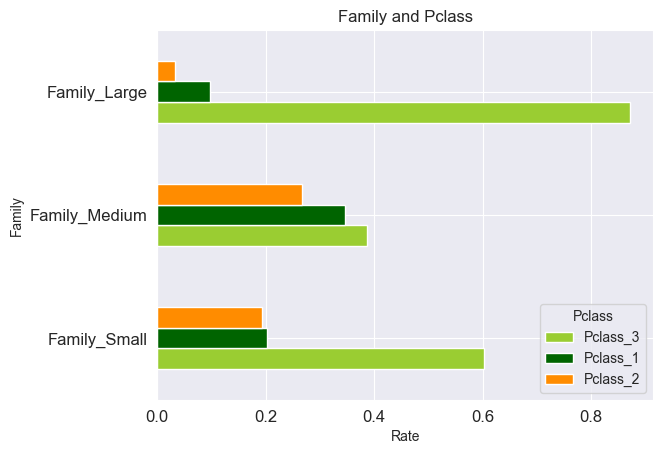

In [49]:
FamilyPclassDf.T.plot(kind='barh',color=['yellowgreen','darkgreen','darkorange'],fontsize=12)
plt.title('Family and Pclass')
plt.xlabel('Rate')
plt.ylabel('Family')
plt.xticks(rotation=0)
plt.show()

得出结论：从图中可知，中等规模家庭一等舱乘客占比最高，约为34.59%，三等舱乘客占比最低，约为38.7%，大规模家庭一等舱乘客占比最低，约为9.68%，三等舱乘客占比最高，约为87.1%，说明大规模家庭主要聚集在三等舱，逃生困难导致整体存活率低，假设二成立。

构架模型

In [50]:
#原始数据集：特征
source_X = full_X.loc[0:sourceRow-1,:]
#原始数据集：标签
source_y = full.loc[0:sourceRow-1,'Survived']
#预测数据集：特征
pred_X = full_X.loc[sourceRow:,:]
print('原始数据集：',source_X.shape)
print('预测数据集：',pred_X.shape)

原始数据集： (891, 28)
预测数据集： (418, 28)


拆分数据集

In [96]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(source_X,source_y,train_size=0.8)
print ('原始数据集特征：',source_X.shape, '训练数据集特征：',train_X.shape ,'测试数据集特征：',test_X.shape)
print ('原始数据集标签：',source_y.shape, '训练数据集标签：',train_y.shape ,'测试数据集标签：',test_y.shape)

原始数据集特征： (891, 28) 训练数据集特征： (712, 28) 测试数据集特征： (179, 28)
原始数据集标签： (891,) 训练数据集标签： (712,) 测试数据集标签： (179,)


In [97]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)

D:\AaStudying\Project\Python\Titanic - Machine Learning from Disaster\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
model.score(test_X,test_y)

0.8547486033519553

In [102]:
pred_X = full_X.loc[sourceRow:,:]
pred_y = model.predict(pred_X)

In [103]:
pred_y=pred_y.astype(int)

In [104]:
#保存结果
predDf = pd.DataFrame({'PassengerId':full.loc[sourceRow:,'PassengerId'],'Survived':pred_y})
predDf.to_csv('Titanic_pred.csv',index='False')
print("预测结果已保存到Titanic_pred.csv")

预测结果已保存到Titanic_pred.csv
